In [10]:
import os
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

In [22]:
import pandas as pd
import numpy as np
from scipy import stats

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

In [25]:
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [26]:
#데이터 생성
s_x = np.linspace(-5, 100, 1000)
s_df = pd.DataFrame(s_x)
s_df.head()

,0
0,-5.000000
1,-4.894895
2,-4.789790
3,-4.684685
4,-4.579580


In [27]:
#차원 정리
s_df_sqz = s_df.squeeze('columns')

In [33]:
#각 샘플 수에 따른 1000개 평균 계산
sample_data = pd.DataFrame({
    'dist' : s_df_sqz.sample(1000),
    'type' : 'Data',
})

sample_mean_05 = pd.DataFrame({
    'dist' : [s_df_sqz.sample(5).mean() for _ in range(1000)],
    'type' : '5개 샘플평균',
})

sample_mean_10 = pd.DataFrame({
    'dist' : [s_df_sqz.sample(10).mean() for _ in range(1000)],
    'type' : '10개 샘플평균',
})
sample_mean_20 = pd.DataFrame({
    'dist' : [s_df_sqz.sample(20).mean() for _ in range(1000)],
    'type' : '20개 샘플평균',
})
sample_mean_30 = pd.DataFrame({
    'dist' : [s_df_sqz.sample(30).mean() for _ in range(1000)],
    'type' : '30개 샘플평균',
})


results = pd.concat([sample_data, sample_mean_05, sample_mean_10, sample_mean_20, sample_mean_30])

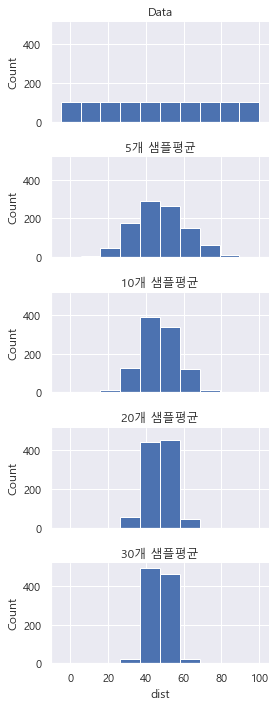

In [34]:
#샘플 수에 따른 표본평균의 시각화
g = sns.FacetGrid(results, col ='type', col_wrap=1, height=2, aspect=2)

g.map(plt.hist, 'dist', range=[-5, 100], bins=10)
g.set_axis_labels('dist', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

In [35]:
#기대값이 50이고 표준편차가 10인 정규분포
#구간 내에 숫자를 균일한 간격으로 생성 (X축)
norm = stats.norm(loc=50, scale=10)

#-10~120까지 2000개 생성
s_x = np.linspace(-10, 120, 2000)

#확률밀도함수
s_pdf = norm.pdf(s_x)

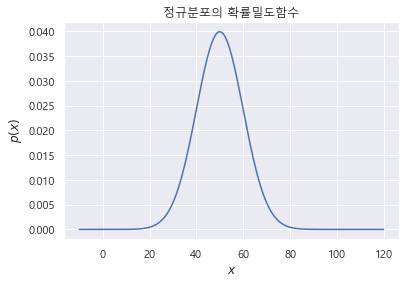

In [37]:
#정규분포 시각화
plt.plot(s_x, s_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [38]:
#동전을 던지는 실험
#동전을 던졌을 때 앞면과 뒷면이 나오는 경우의 표본 데이터 (n=100)를 10회 수집

bag_of_mean = []

for i in range(10) :
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

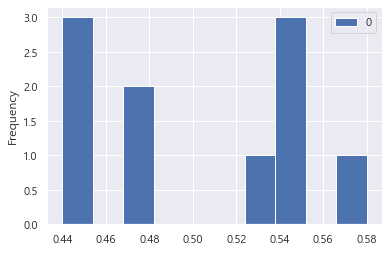

In [39]:
pd.DataFrame(bag_of_mean).plot.hist()

In [40]:
#동전을 던졌을 때 앞면과 뒷면이 나오는 경우의 표본 데이터 (n=100)를 500회 수집

bag_of_mean = []
for i in range(500) :
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

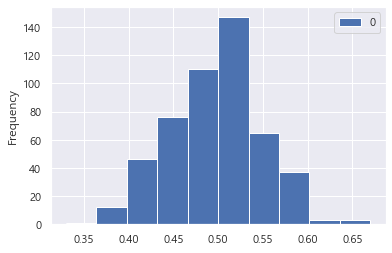

In [41]:
pd.DataFrame(bag_of_mean).plot.hist()

<AxesSubplot:ylabel='Frequency'>

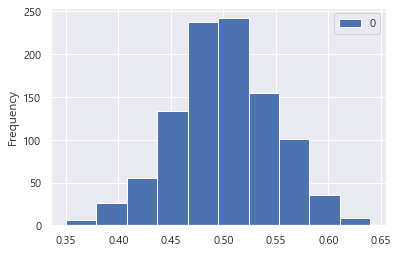

In [42]:
#동전을 던졌을 때 앞면과 뒷면이 나오는 경우의 표본 데이터 (n=100)를 1000회 수집

bag_of_mean = []
for i in range(1000) :
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)
    
pd.DataFrame(bag_of_mean).plot.hist()

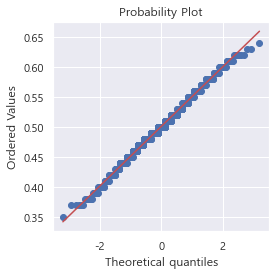

In [43]:
#위 동전실험 사례에 샘플 1000개는 정규성을 따른다고 판단
fig, ax = plt.subplots(figsize = (4, 4))

#norm_sample = stats.norm.rvs(size=100)
stats.probplot(bag_of_mean, plot=ax)

plt.tight_layout()
plt.show()

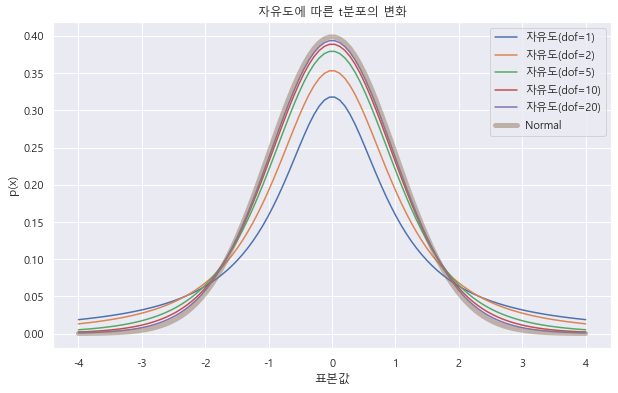

In [46]:
#자유도에 따른 t분포 확인
t_data = np.linspace(-4, 4, 100)

#플롯 사이즈 지정
plt.figure(figsize=(10, 6))

for dof in [1, 2, 5, 10, 20]:
    t_dist = stats.t(df=dof)
    plt.plot(t_data, t_dist.pdf(t_data), label = ("자유도(dof=%d)" % dof))

plt.plot(t_data, stats.norm().pdf(t_data), label="Normal", lw=5, alpha=0.5)
plt.title("자유도에 따른 t분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

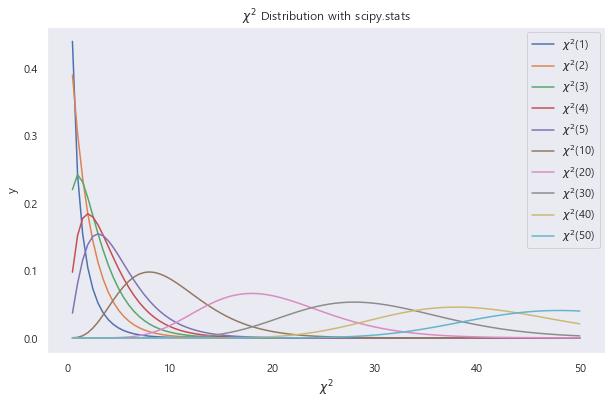

In [53]:
#카이제곱분포 표현
from scipy.stats import chi2

#라인스페이스 x축 설정
Chi_X = np.linspace(0.5, 50, 100)
plt.figure(figsize=(10, 6))


#자유도에 따른 카이제곱분포
for dof in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50] :
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X), label=r'$\chi^2$(' + str(dof) + ')')

                              
plt.xlabel(r'$\chi^2$')
plt.ylabel("y")
plt.grid()
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()
plt.show()

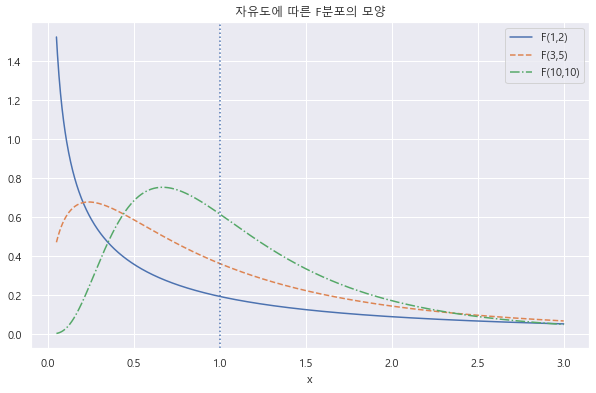

In [58]:
f_data = np.linspace(0.05, 3, 1000)

plt.figure(figsize =(10, 6))
plt.plot(f_data, stats.f(1, 2).pdf(f_data), ls="-", label="F(1,2)")
plt.plot(f_data, stats.f(3, 5).pdf(f_data), ls="--", label="F(3,5)")
plt.plot(f_data, stats.f(10, 10).pdf(f_data), ls="-.", label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel("x")
plt.title("자유도에 따른 F분포의 모양")
plt.legend()
plt.show()